In [1]:
from typing import List, Optional, Tuple, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from utils import ssmr_utils as ssmru
from visualization import papermode

papermode(plt, size=12)


In [2]:
abbrs = tuple(u.abbrange("M", 1, 8))
colors = u.COLORS
terrains = sorted(set(u.get_terrain(a) for a in abbrs))
terr_cols = {terr: colors[terr] for terr in terrains}
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

rot_abbrs = ("M03", "M04", "M05", "M06")
lin_abbrs = ("M01", "M02", "M07")

dashes = {
    "rotational": "-",
    "linear": ":",
}

def add_legends(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    patch = lambda d, c: plt.plot([], [], ls=d, color=c)[0]

    terr_legend_labels, terr_legend_handles = terr_cols.keys(), terr_cols.values()
    terr_legend_handles = [patch("-", col) for col in terr_legend_handles]
    run_legend_labels, run_legend_handles = dashes.keys(), dashes.values()
    run_legend_handles = [patch(dash, "k") for dash in run_legend_handles]

    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    terrain_legend = mpl_elem.legend(
        handles=terr_legend_handles,
        labels=terr_legend_labels,
        bbox_to_anchor=(0, 0.04),
        loc="upper left",
        title="Terrain",
    )
    mpl_elem.add_artist(terrain_legend)

    run_legend = mpl_elem.legend(
        handles=run_legend_handles,
        labels=run_legend_labels,
        bbox_to_anchor=(1, 0.04),
        loc="upper right",
        title="Type of run",
    )
    mpl_elem.add_artist(run_legend)

In [3]:
p2022_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2022df = pentzer2022.pentzer2022(abbr, verbose=False);
    p2022_dfs[abbr] = p2022df

M07: 100%|██████████| 195/195 [00:00<00:00, 2282.80it/s]


In [4]:
model_name = pentzer2022.__MODEL_NAME__.lower()
figdir = u.get_figdir("thesis", subdir=f"modeling/preliminary-{model_name}")

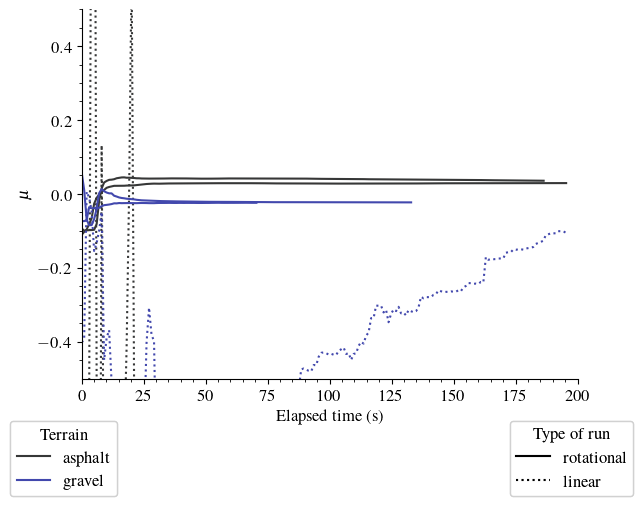

In [5]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rot_abbrs else dashes["linear"]
    ax.plot(
        p2022_dfs[abbr].time_rel,
        p2022_dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1
    )
add_legends(fig)
ax.set_xlabel("Elapsed time (s)")
ax.set_ylabel("$\mu$")
ax.set_ylim(bottom=-0.5, top=0.5)
ax.set_xlim(left=0, right=200)
ax.spines[["right", "top"]].set_visible(False)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

for ext in u.EXTS:
    fig.savefig(figdir / f"m-s.{ext}", bbox_inches="tight")


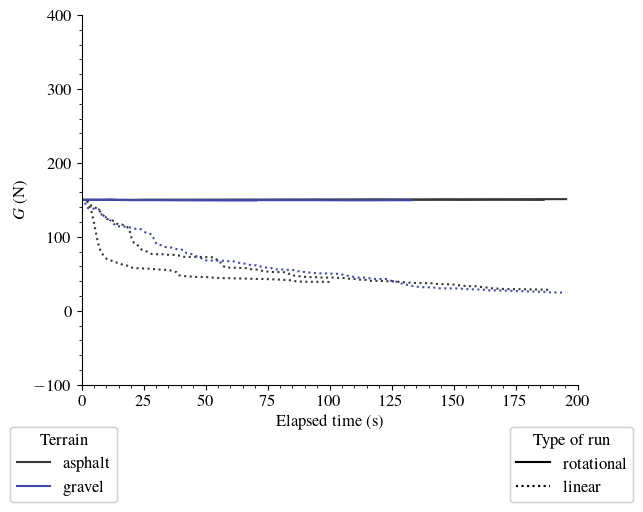

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rot_abbrs else dashes["linear"]
    ax.plot(
        p2022_dfs[abbr].time_rel,
        p2022_dfs[abbr].G_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1
    )
add_legends(fig)
ax.set_xlabel("Elapsed time (s)")
ax.set_ylabel("$G$ (N)")
ax.set_ylim(bottom=-100, top=400)
ax.set_xlim(left=0, right=200)
ax.spines[["right", "top"]].set_visible(False)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

for ext in u.EXTS:
    fig.savefig(figdir / f"G-s.{ext}", bbox_inches="tight")

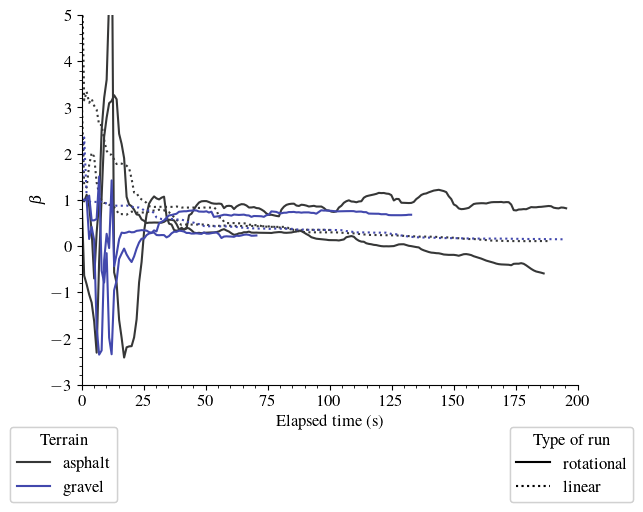

In [9]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rot_abbrs else dashes["linear"]
    ax.plot(
        p2022_dfs[abbr].time_rel,
        p2022_dfs[abbr].B_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1
    )
add_legends(fig)
ax.set_xlabel("Elapsed time (s)")
ax.set_ylabel("$\\beta$")
ax.set_ylim(bottom=-3, top=5)
ax.set_xlim(left=0, right=200)
ax.spines[["right", "top"]].set_visible(False)
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

for ext in u.EXTS:
    fig.savefig(figdir / f"b-s.{ext}", bbox_inches="tight")

# =======

In [8]:
values = {"msym": {}, "masym": {},"Gsym": {}, "Gasym": {}}
for abbr in lin_abbrs:
    df = dfs[abbr]
    terr = u.get_terrain(abbr)
    msym = df.m_sym.dropna().tail(1).item()
    Gsym = df.G_sym.dropna().tail(1).item()
    masym = df.m_asym.dropna().tail(1).item()
    Gasym = df.G_asym.dropna().tail(1).item()
    values["msym"].setdefault(terr, []).append(msym)
    values["Gsym"].setdefault(terr, []).append(Gsym)
    values["masym"].setdefault(terr, []).append(masym)
    values["Gasym"].setdefault(terr, []).append(Gasym)
    print(f"{abbr} : {msym:.2f} & {Gsym:.2f} & {masym:.2f} & {Gasym:.2f} & {terr}")

# print(values)
ave = lambda x: sum(x) / len(x)

for terr in ("asphalt", "gravel"):
    print(terr)
    terr_values = {}
    for k, coeff in values.items():
        vals = coeff[terr]
        terr_values[k] = ave(vals)

    msym = terr_values["msym"]
    Gsym = terr_values["Gsym"]
    masym = terr_values["masym"]
    Gasym = terr_values["Gasym"]
    print(f"{terr:<5} & {msym:.2f} & {Gsym:.2f} & {masym:.2f} & {Gasym:.2f}")


NameError: name 'dfs' is not defined

In [ ]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
ax.set_ylim((-3, 1))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title("Comparaison des $\mu_{asym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_asym_lin.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title("Comparaison des $\mu_{asym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_asym_rot.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{sym}$")
ax.set_title("Comparaison des $G_{sym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_sym_lin.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{sym}$")
ax.set_title("Comparaison des $G_{sym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_sym_rot.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{asym}$")
ax.set_title("Comparaison des $G_{asym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_asym_lin.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{asym}$")
ax.set_title("Comparaison des $G_{asym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_asym_rot.{ext}", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_rel, p2022_dfs[abbr].Perrt_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_legends(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\Delta P_{sym}$")
ax.set_title("Erreur d'estimation de puissance $\Delta P_{sym}$")

In [ ]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(p2022_dfs[abbr].time_rel, p2022_dfs[abbr].Perrt_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_legends(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\Delta P_{asym}$")
ax.set_title("Erreur d'estimation de puissance $\Delta P_{asym}$")


In [ ]:
for abbr in rot_abbrs:
    df = p2022_dfs[abbr]
    fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))

    ax1.plot(df.time_rel, df.Epredt_sym_Wh, label="Model - instant", marker="^", markersize=2)
    ax1.plot(df.time_rel, df.Epredc_sym_Wh, label="Model - converged")
    ax1.plot(df.time_rel, df.energy_Wh, label="Measured")
    ax1.legend()
    ax1.set_title("Symmetrical")

    ax2.plot(df.time_rel, df.Epredt_asym_Wh, label="Model - Instant", marker="^", markersize=2)
    ax2.plot(df.time_rel, df.Epredc_asym_Wh, label="Model - Converged")
    ax2.plot(df.time_rel, df.energy_Wh, label="Measured")
    ax2.legend()
    ax2.set_title("Asymmetrical")

    fig.supylabel("Energy $E$ [Wh]")
    fig.supxlabel("Duration [s]")
    fig.suptitle(f"{abbr} - Energy - {model_name}")

In [ ]:
errors_data = []
for abbr in abbrs:
    model_data = ssmru.model_values_from_json(abbr, pentzer2014pow.__MODEL_NAME__)
    errors = model_data["errors"]
    abbr_data = {
        "name": abbr,
        "motion": "rot" if abbr in rot_abbrs else "lin",
        "terrain": u.get_terrain(abbr),
        "err_casym": errors["casym"],
        "err_csym": errors["csym"],
        "err_tasym": errors["tasym"],
        "err_tsym": errors["tsym"],
    }
    errors_data.append(abbr_data)

In [ ]:
summary = pd.DataFrame(data=errors_data)
for col in ("err_casym", "err_csym", "err_tasym", "err_tsym"):
    summary[col] = 100 * summary[col]

In [ ]:
summary.head()

In [ ]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

In [ ]:
motions = sorted(summary.motion.unique())
soils = ("asphalt", "gravel")
fig, subfigs = plt.subplots(ncols=2, sharey=True, figsize=(10, 7))

# Background color
columns = ("err_tsym", "err_csym")
terrain_description = {
    "asphalt": "Stationnement",
    "gravel": "Dépôt à neige",
}
labels = terrain_description
for errcol, ax in zip(columns, subfigs.reshape(-1)):
    dfcol = f"pc{errcol}"

    POSITIONS = [0, 1]

    v_names = [summary[summary.motion == mot].name.values for mot in motions]
    v_data = [tuple(dfs[dfab][dfcol] for dfab in motnames) for motnames in v_names]
    v_data = [100 * pd.concat(vdat).dropna() for vdat in v_data]

    violins = ax.violinplot(
        v_data,
        positions=POSITIONS,
        widths=0.45,
        bw_method="silverman",
        showmeans=False,
        showmedians=False,
        showextrema=False,
    )

    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(0.7)
        pc.set_alpha(1)

    medianprops = dict(
        linewidth=2,
        color=GREY_DARK,
        solid_capstyle="butt",
    )
    boxprops = dict(
        linewidth=1,
        color=GREY_DARK,
    )

    # Add dot representing the mean
    means = [v.mean() for v in v_data]
    ax.scatter(POSITIONS, means, s=20, color=RED_DARK, zorder=3)

    # ax.boxplot(
    #     v_data,
    #     positions=POSITIONS,
    #     showfliers=False,  # Do not show the outliers beyond the caps.
    #     showcaps=False,  # Do not show the caps
    #     medianprops=medianprops,
    #     whiskerprops=boxprops,
    #     boxprops=boxprops,
    # )

    jitter = 0.04
    # Scatter
    for pos, mot in enumerate(motions):
        for terr in reversed(soils):
            motvals = summary[(summary.motion == mot) & (summary.terrain == terr)]
            names = motvals.name

            motdfs = [dfs[abbr][dfcol].dropna() for abbr in names]
            motdf = 100 * pd.concat(motdfs)

            xdata = pos * np.ones(len(motdf.index))
            x_jittered = xdata + st.t(df=6, scale=jitter).rvs(len(xdata))
            # mask = motvals.terrain == terr
            # xdata = xjitt[mask]
            # ydata = motvals[dfcol].loc[mask]

            ax.plot(
                x_jittered,
                motdf,
                color=colors[terr],
                marker="o",
                label=labels[terr],
                alpha=0.6,
                markersize=1.5,
                linestyle="",
            )
            labels[terr] = "_nolegend_"

    ax.set_xticks(POSITIONS)
    xticklabels = [f"{mot}\n($\mu$ = {m:.2f}\%)" for mot, m in zip(motions, means)]
    ax.set_xticklabels(xticklabels, size=10, ha="center", ma="center")
    ax.set_ylim((-100, 100))

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    # Customize spines color
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)

    xlabel = "Convergé" if dfcol.startswith("pcerr_c") else "Instantané"
    ax.set_xlabel(xlabel)


lgnd = fig.legend()
lgnd.legendHandles[0].set_markersize(10)
lgnd.legendHandles[1].set_markersize(10)
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[0].set_marker("s")
lgnd.legendHandles[1].set_marker("s")
fig.supylabel("\%Erreur estimation consommation [\%]", size=18, weight="bold")
fig.supxlabel("Type d'estimation", size=18, weight="bold")
fig.tight_layout()
for ext in u.EXTS:
    fig.savefig(figdir / f"pcerr_{model_name}.{ext}", bbox_inches="tight")


In [ ]:
ld = lgnd.legendHandles[1].__dir__()
[a for a in ld if "mark" in a]

In [ ]:
fig_colors = {"C0": "Value", "C1": "Covariance"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(15, 8))

for abbr in rot_abbrs:
    dfs[abbr].m_sym.plot(ax=ax1, label="Value", color="C0")
    dfs[abbr].G_sym.plot(ax=ax2, label="Value", color="C0")

# ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
# ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

for abbr in rot_abbrs:
    dfs[abbr].sm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
    dfs[abbr].sG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")

ax1_twin.set_ylim((0, 10))
ax2_twin.set_ylim((0, 100))

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)

# ax1.set_title(f"Optimal value : {optimal['mu']}")
# ax2.set_title(f"Optimal value : {optimal['G']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

# optimal_err = optimal["err"]
fig.suptitle(f"Coefficients et covariances associés à la conduite rotative pour le modèle symétrique")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_rot-covcoeff.{ext}", bbox_inches="tight")

In [ ]:
fig_colors = {"C0": "Value", "C1": "Covariance"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(15, 8))

for abbr in lin_abbrs:
    dfs[abbr].m_sym.plot(ax=ax1, label="Value", color="C0")
    dfs[abbr].G_sym.plot(ax=ax2, label="Value", color="C0")

# ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
# ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

for abbr in lin_abbrs:
    dfs[abbr].sm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
    dfs[abbr].sG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")

ax1_twin.set_ylim((0, 10))
ax2_twin.set_ylim((0, 100))

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)

# ax1.set_title(f"Optimal value : {optimal['mu']}")
# ax2.set_title(f"Optimal value : {optimal['G']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

# optimal_err = optimal["err"]
fig.suptitle(f"Coefficients et covariances associés à la conduite linéaire pour le modèle symétrique")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_lin-covcoeff.{ext}", bbox_inches="tight")